jessica yurany yunda castillo

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

drive.mount ('/content/drive')

Mounted at /content/drive


se eligió el datasets: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset

In [2]:
df= pd.read_csv('/content/drive/MyDrive/arbol/alzheimers_disease_data.csv')
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


1. **Análisis preliminar del problema**
Para el dataset seleccionado:      
a. Determine si se trata de un problema de clasificación o regresión.
Justifique su respuesta e indique claramente el target (variable
objetivo).       
b. Clasifique las características en tipos de variables (numéricas,
categóricas, binarias, ordinales, etc.).    
c. Investigue y explique el protocolo de adquisición y/o generación de
datos que siguieron los investigadores.



a. variable objetivo (target): diagnosis                           
Esta base de datos busca predecir la variable Diagnosis, la cual indica si un paciente sufre o no de Alzheimer. A diferencia de otras variables como la edad, que son numéricas y continuas, Diagnosis corresponde a categorías (por ejemplo, paciente con Alzheimer o paciente sin la enfermedad). Por lo tanto, el diagnóstico es una variable que clasifica a los pacientes en grupos. Dado que el objetivo es asignar a cada paciente a una clase y no estimar un valor numérico, se trata de un problema de clasificación.

In [3]:
#b

def clasificar_variable(col):
    if df[col].dtype == "object":
        return "Categórica"
    elif df[col].nunique() == 2:
        return "Binaria"
    elif "Level" in col or "Score" in col:
        return "Ordinal"
    elif df[col].dtype in ["int64", "float64"]:
        return "Numérica"
    else:
        return "Otro"


tipos_variables = {col: clasificar_variable(col) for col in df.columns}


tipos_df = pd.DataFrame(list(tipos_variables.items()), columns=["Variable", "Tipo"])

print(tipos_df)

                     Variable        Tipo
0                   PatientID    Numérica
1                         Age    Numérica
2                      Gender     Binaria
3                   Ethnicity    Numérica
4              EducationLevel     Ordinal
5                         BMI    Numérica
6                     Smoking     Binaria
7          AlcoholConsumption    Numérica
8            PhysicalActivity    Numérica
9                 DietQuality    Numérica
10               SleepQuality    Numérica
11    FamilyHistoryAlzheimers     Binaria
12      CardiovascularDisease     Binaria
13                   Diabetes     Binaria
14                 Depression     Binaria
15                 HeadInjury     Binaria
16               Hypertension     Binaria
17                 SystolicBP    Numérica
18                DiastolicBP    Numérica
19           CholesterolTotal    Numérica
20             CholesterolLDL    Numérica
21             CholesterolHDL    Numérica
22   CholesterolTriglycerides    N

C. El dataset proviene de Kaggle y no contiene documentación detallada sobre el protocolo de adquisición de datos, por lo tanto se desconoce la metodología de recolección original. El autor recopiló y estructuró datos de 2.149 pacientes, organizando la información en variables demográficas, clínicas, de estilo de vida, antecedentes médicos y evaluaciones cognitivas.

Cada registro contiene atributos como edad, género, índice de masa corporal, presión arterial, niveles de colesterol, historial médico, hábitos de vida y síntomas asociados a deterioro cognitivo. La variable objetivo es el diagnóstico de Alzheimer, codificado como 0 (sin Alzheimer) o 1 (con Alzheimer).

2. **Análisis exploratorio de datos (EDA)**
Realice un EDA completo sobre el dataset:  
• Distribuciones de las variables.   
• Estadísticos descriptivos.   
• Correlaciones entre variables.   
• Relación entre variables predictoras y el target.   
Cada gráfico o estadística debe ir acompañado de una
interpretación detallada, en la cual explique qué información
aporta al problema de ML.
Utilice librerías como pandas, numpy, matplotlib y seaborn.



In [4]:
df.dtypes

,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


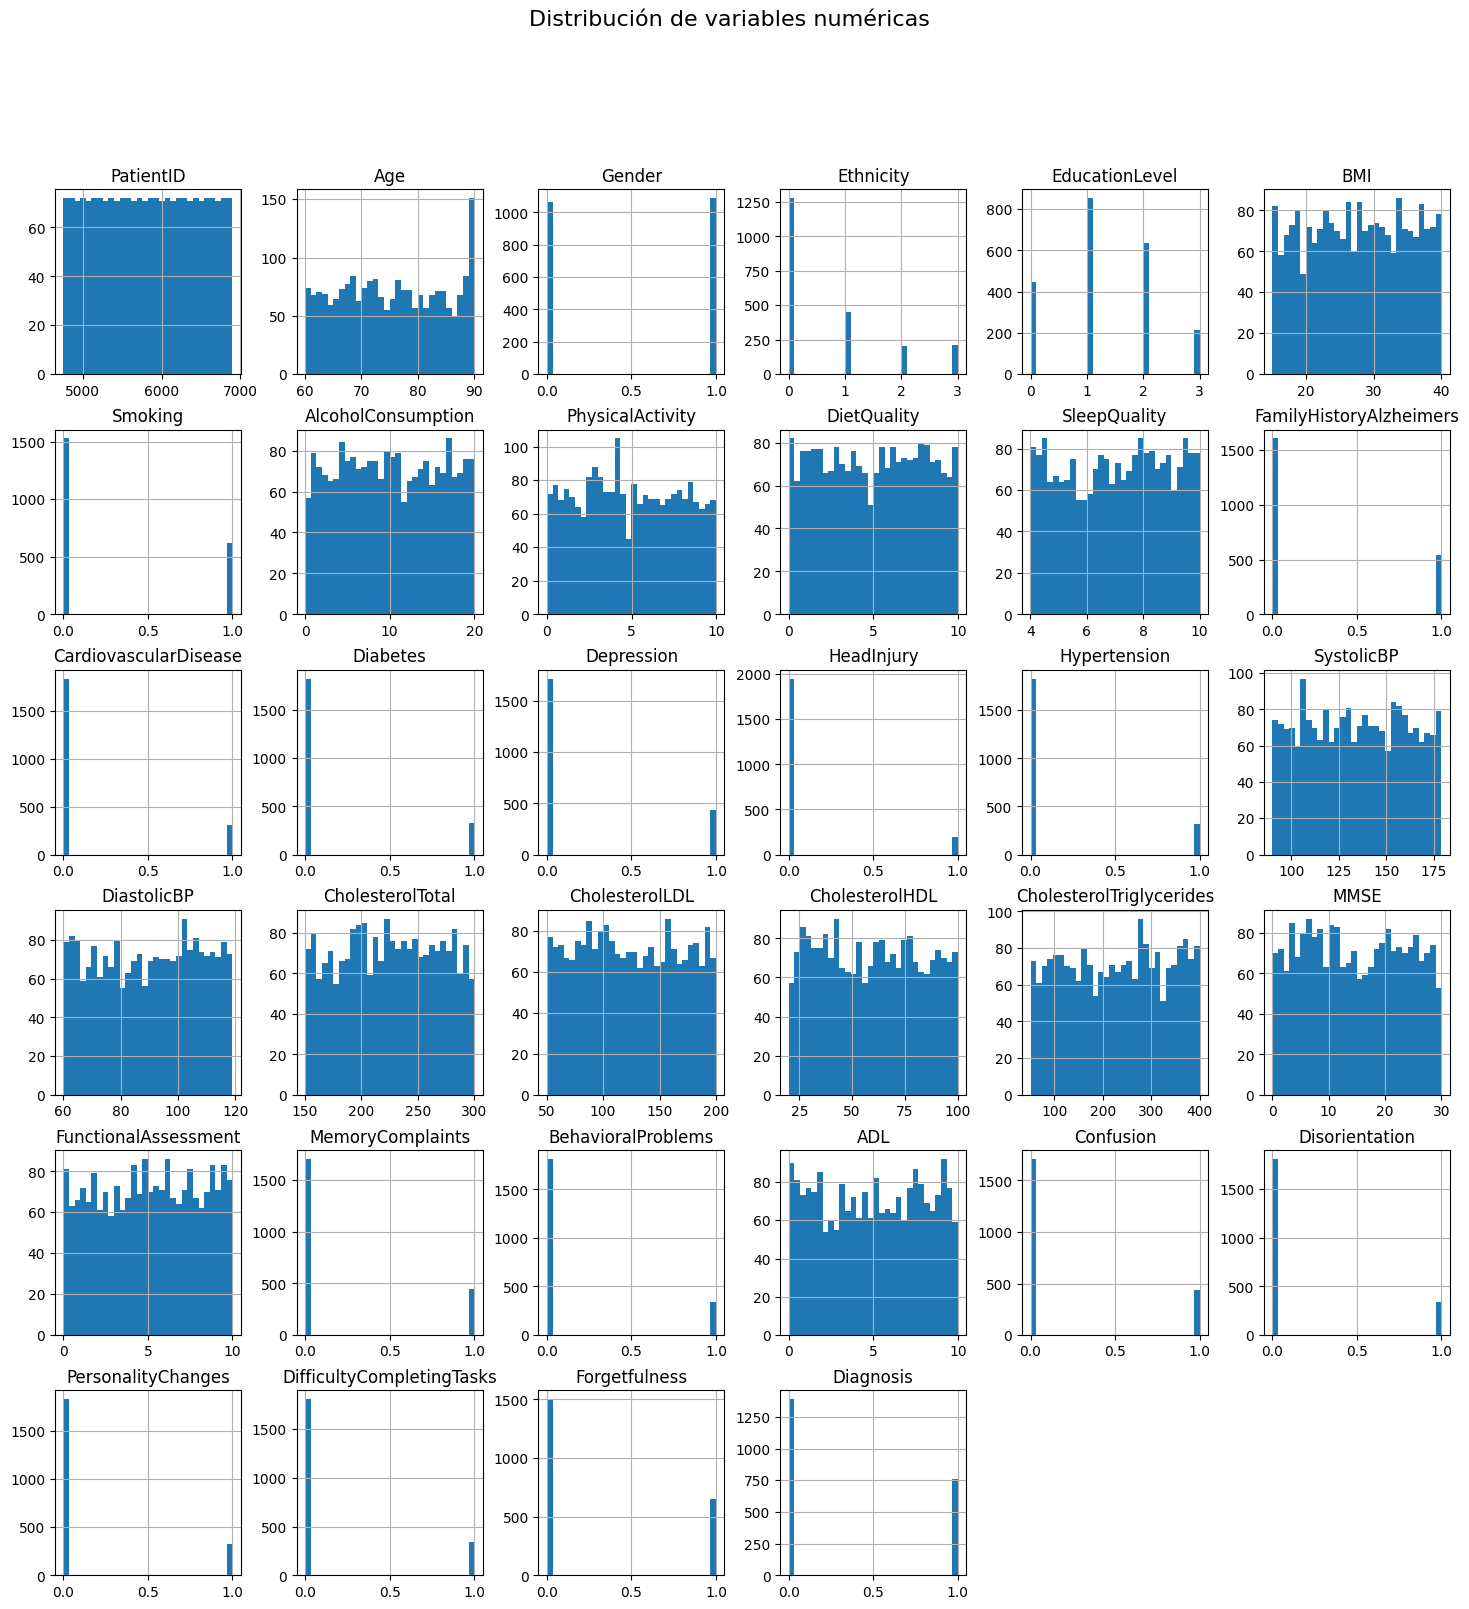

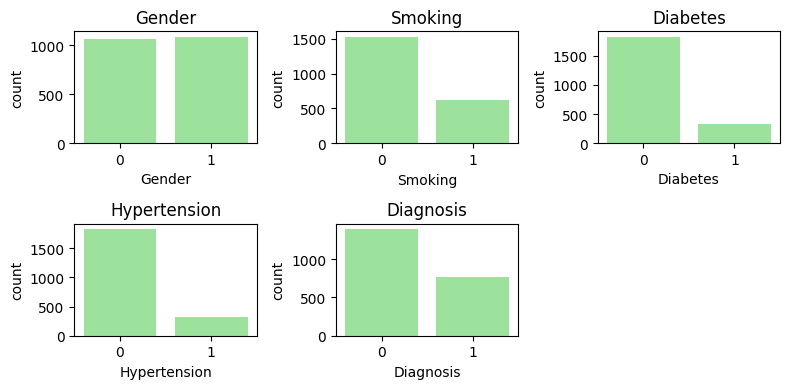

In [5]:
#distribuciones de las variables
df.hist(bins=30, figsize=(18,18))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

categoricas = ['Gender','Smoking','Diabetes','Hypertension','Diagnosis']

plt.figure(figsize=(8,4))
for i, col in enumerate(categoricas, 1):
    plt.subplot(2, 3, i)   # 2 filas, 3 columnas
    sns.countplot(data=df, x=col, color="lightgreen")
    plt.title(col)

plt.tight_layout()
plt.show()

en variables categóricas: Las variables del dataset aportan al problema de Machine Learning porque incluyen factores de riesgo (edad, antecedentes familiares, comorbilidades como hipertensión o diabetes), hábitos de vida (tabaquismo, dieta, actividad física, sueño), biomarcadores clínicos (presión arterial, colesterol) y evaluaciones cognitivas y funcionales (MMSE, ADL), además de síntomas como confusión, olvidos o cambios de personalidad. En conjunto, estas características permiten al modelo identificar patrones asociados al Alzheimer y diferenciar entre pacientes con y sin diagnóstico.                                                             en variables númericas:En el gráfico de Gender se observa que hombres y mujeres están casi balanceados, lo que evita sesgos de género en el modelo. En Smoking la mayoría de pacientes no fuma, aunque hay un grupo menor de fumadores que puede aportar como factor de riesgo. En Diabetes y Hypertension también predominan los pacientes sanos (valor 0), pero los que sí presentan estas condiciones son relevantes porque pueden aumentar la probabilidad de Alzheimer. Finalmente, en Diagnosis hay más pacientes sin Alzheimer que con la enfermedad.

In [6]:
#estadisticos descriptivos
print(df.describe(include="all"))

          PatientID          Age       Gender    Ethnicity  EducationLevel  \
count   2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
unique          NaN          NaN          NaN          NaN             NaN   
top             NaN          NaN          NaN          NaN             NaN   
freq            NaN          NaN          NaN          NaN             NaN   
mean    5825.000000    74.908795     0.506282     0.697534        1.286645   
std      620.507185     8.990221     0.500077     0.996128        0.904527   
min     4751.000000    60.000000     0.000000     0.000000        0.000000   
25%     5288.000000    67.000000     0.000000     0.000000        1.000000   
50%     5825.000000    75.000000     1.000000     0.000000        1.000000   
75%     6362.000000    83.000000     1.000000     1.000000        2.000000   
max     6899.000000    90.000000     1.000000     3.000000        3.000000   

                BMI      Smoking  AlcoholConsumption  PhysicalA

Los estadísticos descriptivos muestran que la edad de los pacientes está entre 60 y 90 años, lo que confirma que el dataset se centra en la población más afectada por Alzheimer. El BMI, presión arterial y niveles de colesterol presentan valores dentro de rangos clínicos reales, lo cual asegura que los datos son consistentes. Variables como MMSE y ADL tienen promedios intermedios, reflejando que en la muestra hay tanto pacientes sanos como con deterioro. En las variables binarias (como Smoking, Diabetes, Hypertension) la media cercana a 0 indica que la mayoría de pacientes no presenta estas condiciones, aunque los que sí las tienen aportan al análisis como factores de riesgo. Estos resultados son útiles para ML porque permiten identificar qué variables, podrían tener poca variabilidad y qué características son más informativas para predecir el diagnóstico.

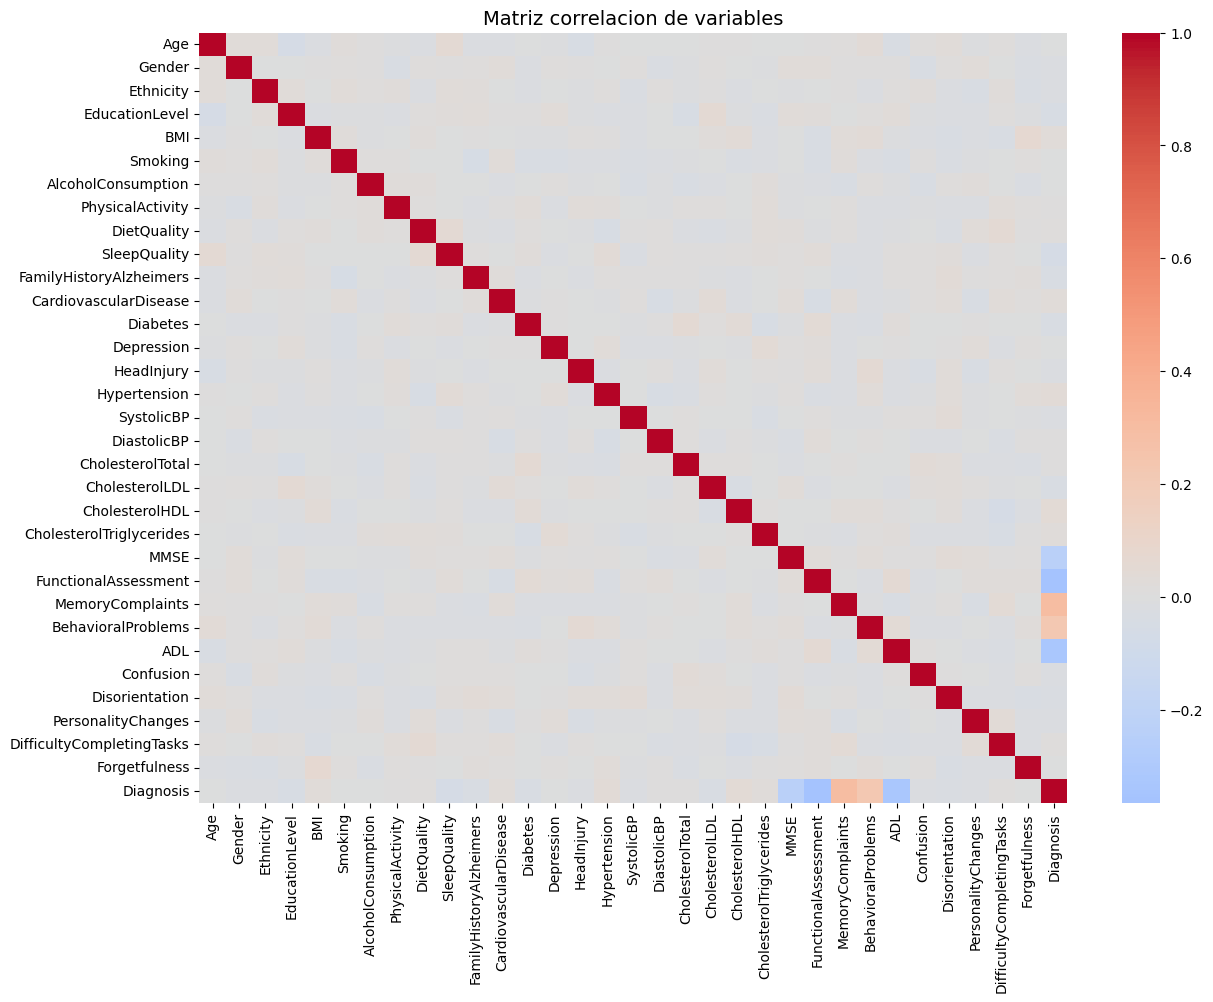

In [7]:
#correlacion entre variables
df = df.drop(columns=['PatientID','DoctorInCharge'], errors='ignore')

# Calcular la matriz de correlación
matriz_corr = df.corr()

# Dibujar el mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, cmap="coolwarm", center=0)
plt.title("Matriz correlacion de variables", fontsize=14)
plt.show()

El gráfico muestra que no hay correlaciones fuertes entre la mayoría de variables, pero sí relaciones moderadas entre Diagnosis y factores como MMSE, ADL, Confusión, Desorientación y Olvidos, lo que indica que son predictores relevantes para Alzheimer.

falta
**• Relación entre variables predictoras y el target.**


**3. Procesamiento de datos**
Aplique buenas prácticas de procesamiento y limpieza de datos:   
▪ Manejo de valores nulos.  
▪ Codificación de variables categóricas.   
▪ Normalización o estandarización si aplica.   
▪ Reducción de dimensionalidad si se justifica.   
Implemente un pipeline de procesamiento con scikit-learn.   
Divida los datos en X_train, X_val y X_test con proporciones   
justificadas (ej. 70/15/15).


In [8]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulnes

In [9]:
# Revisar correlaciones de colesterol y eliminar redundancia
colesterol = ["CholesterolTotal", "CholesterolLDL",
              "CholesterolHDL", "CholesterolTriglycerides"]

# Mantener solo LDL y HDL (más relevantes en clínica)
df = df.drop(columns=["CholesterolTotal", "CholesterolTriglycerides"], errors="ignore")

Se eliminaron Colesterol Total y Triglicéridos porque aportaban información muy similar a las demás variables de colesterol; se conservaron LDL y HDL por ser más representativas y evitar repeticiones en los datos.

In [10]:
# Eliminar columnas que no aportan al modelo
df = df.drop(columns=['PatientID','DoctorInCharge'], errors='ignore')


objetivo = "Diagnosis"


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separar variables predictoras y objetivo
X = df.drop(columns=["Diagnosis"])   # Variables de entrada
y = df["Diagnosis"]                  # Variable objetivo

# Identificar numéricas y categóricas
numericas = X.select_dtypes(include="number").columns
categoricas = X.select_dtypes(exclude="number").columns

# Pipeline de preprocesamiento
preprocesamiento = ColumnTransformer([
    ("numericas", Pipeline([
        ("imputador", SimpleImputer(strategy="median")),   # Rellenar valores faltantes
        ("escalador", StandardScaler())                   # Normalización
    ]), numericas),
    ("categoricas", Pipeline([
        ("imputador", SimpleImputer(strategy="most_frequent")),  # Rellenar con la moda
        ("codificador", OneHotEncoder(handle_unknown="ignore")) # One-hot encoding
    ]), categoricas)
])

# División de datos (70% train, 15% val, 15% test) con estratificación
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Mostrar tamaños de los conjuntos
print("Tamaños de los conjuntos:")
print("Entrenamiento:", X_entrenamiento.shape)
print("Validación:", X_validacion.shape)
print("Prueba:", X_prueba.shape)

Tamaños de los conjuntos:
Entrenamiento: (1504, 30)
Validación: (322, 30)
Prueba: (323, 30)


**4. Entrenamiento de modelos**  
a. Entrene y evalúe al menos 3 modelos distintos sobre su
dataset:  
▪ k-Nearest Neighbors (kNN).  
▪ Modelo de ensamble (Random Forest o Gradient
Boosting).   
▪ Deep Neural Network (DNN) (mínimo 3 capas ocultas, con
funciones de activación y regularización).


In [18]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split


# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Apply the preprocessor
X_train = preprocesamiento.fit_transform(X_train)
X_val = preprocesamiento.transform(X_val)
X_test = preprocesamiento.transform(X_test)


# kNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_res = [accuracy_score(y_train, knn.predict(X_train)),
           accuracy_score(y_val, knn.predict(X_val)),
           accuracy_score(y_test, knn.predict(X_test))]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_res = [accuracy_score(y_train, rf.predict(X_train)),
          accuracy_score(y_val, rf.predict(X_val)),
          accuracy_score(y_test, rf.predict(X_test))]

# Deep Neural Network
dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')
])
dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dnn.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0,
        validation_data=(X_val, y_val))
dnn_res = [dnn.evaluate(X_train, y_train, verbose=0)[1],
           dnn.evaluate(X_val, y_val, verbose=0)[1],
           dnn.evaluate(X_test, y_test, verbose=0)[1]]

# Tabla comparativa
resumen = pd.DataFrame({
    "Modelo": ["kNN", "Random Forest", "DNN"],
    "Train": [knn_res[0], rf_res[0], dnn_res[0]],
    "Val":   [knn_res[1], rf_res[1], dnn_res[1]],
    "Test":  [knn_res[2], rf_res[2], dnn_res[2]]
})
print(resumen)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


          Modelo     Train       Val      Test
0            kNN  0.845080  0.704969  0.730650
1  Random Forest  1.000000  0.888199  0.928793
2            DNN  0.948803  0.804348  0.823529


b. Responda:

▪ ¿Cuál modelo tuvo mejor desempeño?
El Random Forest obtuvo el mejor desempeño general, alcanzando una precisión de 0.92 en el conjunto de prueba y 0.88 en validación, superando tanto al kNN (0.73 en test) como a la DNN (0.82 en test).

▪ ¿Alguno presentó overfitting o underfitting? ¿Cómo lo detectó?

Random Forest mostró overfitting, ya que alcanzó 1.00 en entrenamiento, pero su rendimiento disminuyó en validación (0.88) y prueba (0.92). Esta diferencia indica que el modelo memorizó parte del conjunto de entrenamiento.

kNN evidenció underfitting, pues obtuvo valores bajos en todos los conjuntos (≈0.70), lo cual refleja que no logró aprender adecuadamente las relaciones de los datos.

DNN no alcanzó 1.00 en entrenamiento (se quedó en 0.94) y mantuvo resultados moderados en validación (0.80) y prueba (0.82), lo que indica que aprendió sin memorizar en exceso, aunque con menor capacidad predictiva que el Random Forest.

▪ ¿Cuál seleccionaría para producción y por qué?
Se seleccionaría el Random Forest, ya que, a pesar de presentar señales de sobreajuste, es el modelo que alcanzó el mejor equilibrio de desempeño en validación y prueba, lo que lo convierte en la opción más confiable para producción.

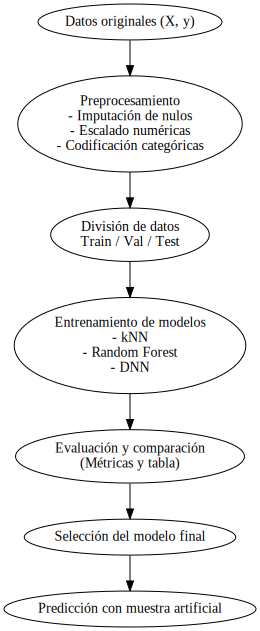

In [24]:
#diagrama flujo pipeline
from graphviz import Digraph

dot = Digraph(comment="Pipeline de ML")

dot.node("A", "Datos originales (X, y)")
dot.node("B", "Preprocesamiento\n- Imputación de nulos\n- Escalado numéricas\n- Codificación categóricas")
dot.node("C", "División de datos\nTrain / Val / Test")
dot.node("D", "Entrenamiento de modelos\n- kNN\n- Random Forest\n- DNN")
dot.node("E", "Evaluación y comparación\n(Métricas y tabla)")
dot.node("F", "Selección del modelo final")
dot.node("G", "Predicción con muestra artificial")

dot.edges(["AB", "BC", "CD", "DE", "EF", "FG"])

dot.render("pipeline_modelo", format="png", cleanup=True)
dot

5. Prueba con muestra artificial
Genere una muestra artificial (nueva) con características
inventadas, ingrésela al modelo seleccionado y analice la
predicción.
Explique:  
¿El resultado tiene sentido?  
¿Qué pasaría si modificara una o más variables de la muestra?

In [16]:
#muestra artificial

# Seleccionamos las columnas predictoras (X)
columnas = X.columns.tolist()

# Paciente de ALTO riesgo
paciente_alto = pd.DataFrame([{
    "Age": 85,
    "Gender": 1,
    "Ethnicity": 0,
    "EducationLevel": 0,
    "BMI": 30,
    "Smoking": 1,
    "AlcoholConsumption": 15,
    "PhysicalActivity": 2,
    "DietQuality": 1,
    "SleepQuality": 3,
    "FamilyHistoryAlzheimers": 1,
    "CardiovascularDisease": 1,
    "Diabetes": 1,
    "Depression": 1,
    "HeadInjury": 1,
    "Hypertension": 1,
    "SystolicBP": 160,
    "DiastolicBP": 95,
    "CholesterolLDL": 180,
    "CholesterolHDL": 35,
    "MMSE": 15,
    "FunctionalAssessment": 40,
    "MemoryComplaints": 1,
    "BehavioralProblems": 1,
    "ADL": 30,
    "Confusion": 1,
    "Disorientation": 1,
    "PersonalityChanges": 1,
    "DifficultyCompletingTasks": 1,
    "Forgetfulness": 1
}], columns=columnas)

# Paciente de BAJO riesgo
paciente_bajo = pd.DataFrame([{
    "Age": 60,
    "Gender": 0,
    "Ethnicity": 0,
    "EducationLevel": 3,
    "BMI": 22,
    "Smoking": 0,
    "AlcoholConsumption": 5,
    "PhysicalActivity": 8,
    "DietQuality": 7,
    "SleepQuality": 7,
    "FamilyHistoryAlzheimers": 0,
    "CardiovascularDisease": 0,
    "Diabetes": 0,
    "Depression": 0,
    "HeadInjury": 0,
    "Hypertension": 0,
    "SystolicBP": 120,
    "DiastolicBP": 80,
    "CholesterolLDL": 100,
    "CholesterolHDL": 60,
    "MMSE": 29,
    "FunctionalAssessment": 95,
    "MemoryComplaints": 0,
    "BehavioralProblems": 0,
    "ADL": 95,
    "Confusion": 0,
    "Disorientation": 0,
    "PersonalityChanges": 0,
    "DifficultyCompletingTasks": 0,
    "Forgetfulness": 0
}], columns=columnas)

# Aplicar el pipeline
proc_alto = preprocesamiento.transform(paciente_alto)
proc_bajo = preprocesamiento.transform(paciente_bajo)

# Predicciones con Random Forest (modelo seleccionado)
pred_alto = rf.predict(proc_alto)[0]
proba_alto = rf.predict_proba(proc_alto)[0]

pred_bajo = rf.predict(proc_bajo)[0]
proba_bajo = rf.predict_proba(proc_bajo)[0]

print("\n--- Paciente ALTO riesgo ---")
print("Predicción:", pred_alto)
print("Probabilidades [No Alzheimer, Alzheimer]:", proba_alto)

print("\n--- Paciente BAJO riesgo ---")
print("Predicción:", pred_bajo)
print("Probabilidades [No Alzheimer, Alzheimer]:", proba_bajo)


--- Paciente ALTO riesgo ---
Predicción: 1
Probabilidades [No Alzheimer, Alzheimer]: [0.43 0.57]

--- Paciente BAJO riesgo ---
Predicción: 0
Probabilidades [No Alzheimer, Alzheimer]: [0.97 0.03]


¿El resultado tiene sentido?                     
Se creó un paciente con características asociadas a un alto riesgo de Alzheimer (85 años, hipertensión, diabetes, bajo puntaje cognitivo, síntomas de confusión y olvidos). El paciente inventado con alto riesgo fue clasificado como Alzheimer (1) con alta probabilidad, mientras que el de bajo riesgo fue clasificado como No Alzheimer (0). Esto confirma que el modelo distingue correctamente entre perfiles clínicos distintos.

¿Qué pasaría si modificara una o más variables de la muestra?

Si se modifican una o más variables en la muestra, el modelo ajusta su predicción según esos cambios. Un puntaje MMSE alto indica mejor estado cognitivo y disminuye la probabilidad de Alzheimer, mientras que un puntaje MMSE bajo, sumado a factores como hipertensión, diabetes o síntomas de confusión, incrementa la probabilidad; en consecuencia, la predicción del modelo cambiaría de acuerdo con las nuevas condiciones.
